#### Importing required Libraries


In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the dataset 
aircraft_types = pd.read_csv('aircraft_types.csv')
print(aircraft_types.head())

          Aircraft Name      Manufacturer Country  Weight (kg)  Speed (km/h)  \
0  F-16 Fighting Falcon             United States      12000.0        2124.0   
1         Su-27 Flanker                    Russia      30000.0        2500.0   
2   B-52 Stratofortress             United States     220000.0        1000.0   
3   Eurofighter Typhoon  Multi-national (Germany)      11000.0        2495.0   
4         F/A-18 Hornet             United States      14500.0        1800.0   

   Operational Range (km)                         Payload Payload2     Type  
0                  4200.0                         AIM-120    AIM-9  Fighter  
1                  3530.0                            R-73     R-77  Fighter  
2                 14000.0  Nuclear and conventional bombs      NaN   Bomber  
3                  2900.0                          Meteor   IRIS-T  Fighter  
4                  3330.0                           AIM-7  AIM-120  Fighter  


In [9]:
# Checking for missing values 
print(aircraft_types.isnull().sum())

# Filling in 'Unknown' for missing string values
aircraft_types.fillna({'Manufacturer Country': 'Unknown'}, inplace=True)
aircraft_types.fillna({'Payload2' : 'Unknown'}, inplace=True)

# Dropping unnecessary columns
aircraft_types.drop(columns=['Aircraft Name', 'Manufacturer Country', 'Payload', 'Payload2'], inplace=True)


Aircraft Name              0
Manufacturer Country       1
Weight (kg)                0
Speed (km/h)               0
Operational Range (km)     0
Payload                    0
Payload2                  11
Type                       0
dtype: int64


In [10]:
aircraft_types.shape

(40, 4)

In [11]:
aircraft_types.head()

,Weight (kg),Speed (km/h),Operational Range (km),Type
0,12000.0,2124.0,4200.0,Fighter
1,30000.0,2500.0,3530.0,Fighter
2,220000.0,1000.0,14000.0,Bomber
3,11000.0,2495.0,2900.0,Fighter
4,14500.0,1800.0,3330.0,Fighter


In [12]:
aircraft_types.describe()

,Weight (kg),Speed (km/h),Operational Range (km)
count,40.000000,40.000000,40.000000
mean,25642.500000,1868.975000,3619.000000
std,45694.985909,653.784152,2509.128769
min,1000.000000,720.000000,1000.000000
25%,9500.000000,1077.500000,2175.000000
50%,13900.000000,2122.000000,3000.000000
75%,19250.000000,2414.000000,4050.000000
max,220000.000000,2655.000000,14000.000000


#### Plotting a Heatmap 


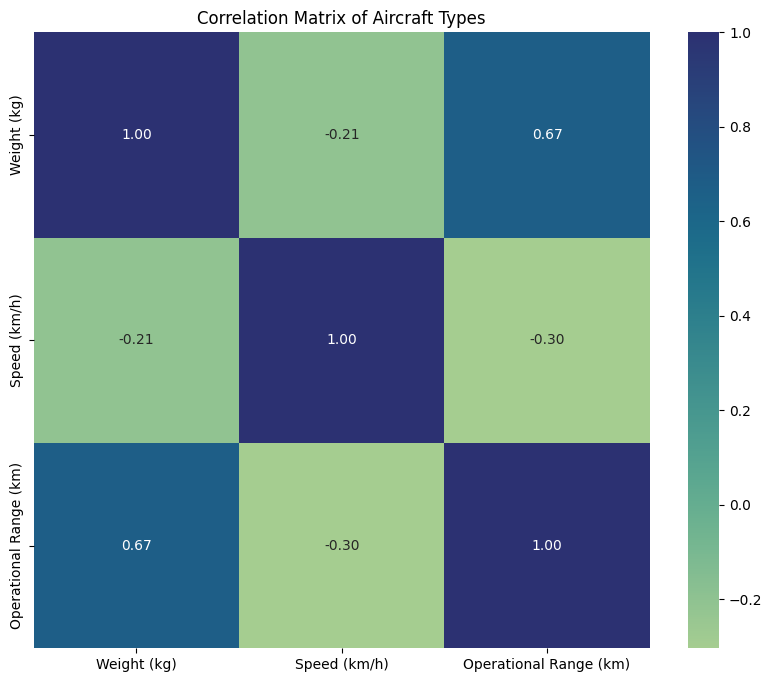

In [13]:
aircraft_types_temp = aircraft_types.select_dtypes(include=['float64', 'int64'])
correlation_matrix = aircraft_types_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', square=True, cbar=True)
plt.title('Correlation Matrix of Aircraft Types')
plt.show()

#### Distribution of aircraft types


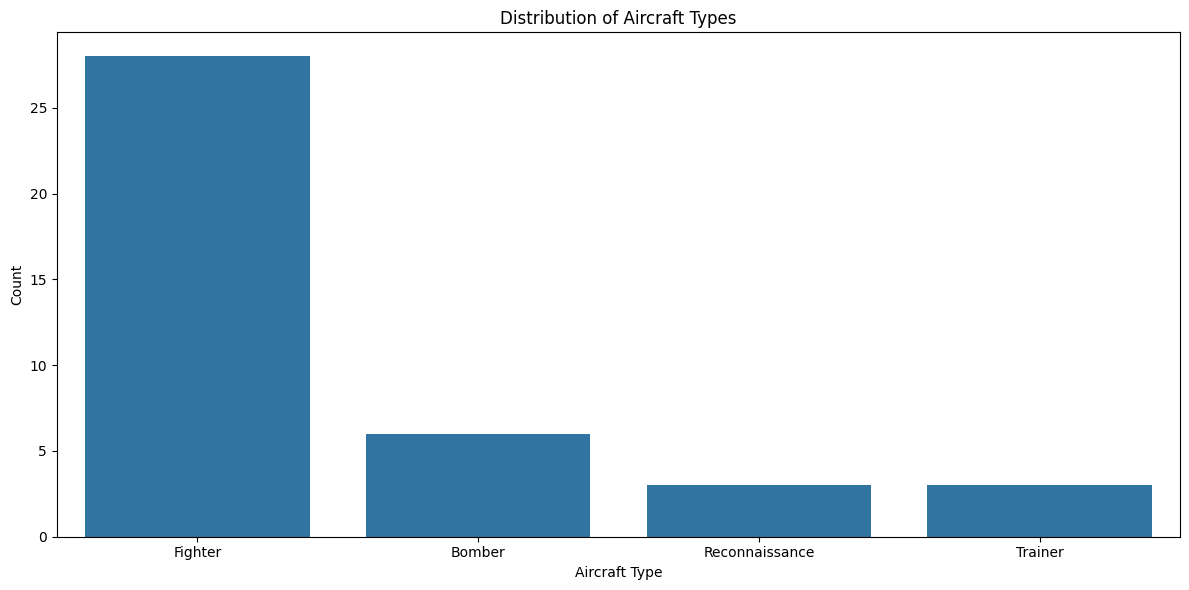

In [14]:
aircraft_types_type = aircraft_types.select_dtypes(include=['object'])
plt.figure(figsize=(12, 6))
sns.countplot(data=aircraft_types_type, x='Type', order=aircraft_types_type['Type'].value_counts().index)
plt.title('Distribution of Aircraft Types')
plt.xlabel('Aircraft Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Preparing the features and the target

In [15]:
features = ['Speed (km/h)', 'Weight (kg)', 'Operational Range (km)']
X = aircraft_types[features]
y = aircraft_types['Type']


#### Train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Using the RandomForest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, random_state=1, class_weight='balanced_subsample')
model.fit(X_train, y_train)
predictions = model.predict(X_test)


#### Metrics 

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

        Bomber       0.67      1.00      0.80         2
       Fighter       0.83      1.00      0.91         5
Reconnaissance       0.00      0.00      0.00         2
       Trainer       1.00      1.00      1.00         1

      accuracy                           0.80        10
     macro avg       0.62      0.75      0.68        10
  weighted avg       0.65      0.80      0.71        10



/home/usayanjit/Projects/Python/ML/jets/.venv/lib64/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usayanjit/Projects/Python/ML/jets/.venv/lib64/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usayanjit/Projects/Python/ML/jets/.venv/lib64/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

#### Saving the model

In [19]:
import joblib
joblib.dump(model, 'aircraft_classifier.pkl')

['aircraft_classifier.pkl']